In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import numpy as np

In [2]:
# Set random seed for reproducibility
np.random.seed(42)  # <-- Added random seed

UNBALANCED DATASET

In [ ]:
# Load dataset
df = pd.read_csv("../Datasets/Unbalanced_Binary.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,target
0,-1.944044,1.891310,5.378017,-1.099764,0.319998,-0.107990,0.192998,-0.531588,-1.978358,0.505306,...,0.435838,-0.375777,-2.410484,1.307302,-0.447091,-1.205613,-0.758668,-1.115528,1.219782,1
1,0.548890,3.689146,-1.079215,-1.125497,6.892610,-0.114086,-0.129833,-4.471123,1.281707,2.509007,...,-0.515136,-1.814937,-0.659753,0.092014,1.173449,-0.887015,-0.657684,0.676340,0.379053,1
2,1.044743,2.804073,-1.779122,-0.358211,6.132624,-1.309396,-0.731316,-3.381683,-1.444734,3.028355,...,-0.928873,-1.592203,-0.389953,0.343527,0.740160,-0.244341,-1.337129,-0.168281,-0.464880,1
3,-2.848743,-2.220174,-0.498797,-0.054547,0.073406,0.927517,1.891807,-0.381548,0.017551,0.659493,...,0.662054,0.671306,-0.463003,-0.170516,0.249816,0.019505,-0.380889,-0.222127,0.364851,1
4,-0.715628,0.217362,2.032461,-0.144826,4.375660,-1.762026,1.335940,1.742721,-1.771379,0.819612,...,-0.428352,-0.511074,-0.346423,0.137622,-0.289325,-1.089344,-0.407556,-0.007071,0.117600,1


In [4]:
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
target
1    464
0     80
Name: count, dtype: int64


In [5]:
# Splitting features and target
X = df.drop(columns=['target'])
y = df['target']

In [6]:
# Standardizing features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

KMeans - sklearn

In [7]:
# KMeans - sklearn
kmeans = KMeans(n_clusters=2, init='random', n_init=20, random_state=42)
kmeans.fit(X)
predictions = kmeans.predict(X)

# Adjust cluster labels to match ground truth
if np.sum(predictions == y) < np.sum(predictions != y):
    predictions = 1 - predictions  # Inverting labels if they are flipped

# Calculate accuracy (optional, since KMeans is unsupervised)
accuracy = accuracy_score(y, predictions)
print("Final Centroids:", kmeans.cluster_centers_)
print("Cluster Assignments:", predictions)
print(f"\nAccuracy: {accuracy*100:.3f}%")

c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Final Centroids: [[-3.04014267e+00  3.97354431e-01 -1.74449891e-02  6.54280158e-02
   1.36527368e-01  1.82060671e-01 -5.75509628e-02 -4.15334364e-02
   1.89733833e-02  5.98103790e-02 -6.67151770e-02  7.27669167e-02
   3.03033277e-02  1.86492770e-02 -3.35647208e-02 -2.63490260e-02
   5.19368625e-02  4.08029226e-02 -4.43243628e-02 -2.53881234e-02
   3.12828747e-02 -5.44991882e-03  6.91860057e-03  2.22489348e-03
   3.04331528e-02  2.08481418e-02  1.92115500e-02 -3.13411795e-02
  -5.22824577e-03]
 [ 3.49676489e+00 -4.57036124e-01  2.00651851e-02 -7.52551486e-02
  -1.57033455e-01 -2.09405753e-01  6.61949810e-02  4.77716601e-02
  -2.18231405e-02 -6.87937560e-02  7.67356384e-02 -8.36963350e-02
  -3.48548156e-02 -2.14503542e-02  3.86060623e-02  3.03065872e-02
  -5.97376561e-02 -4.69314248e-02  5.09817770e-02  2.92013593e-02
  -3.59814882e-02  6.26848370e-03 -7.95775797e-03 -2.55906721e-03
  -3.50041401e-02 -2.39794832e-02 -2.20970793e-02  3.60485503e-02
   6.01351588e-03]]
Cluster Assignments:

In [8]:
# Classification report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.21      0.68      0.32        80
           1       0.91      0.57      0.70       464

    accuracy                           0.59       544
   macro avg       0.56      0.62      0.51       544
weighted avg       0.81      0.59      0.65       544



Confusion Matrix


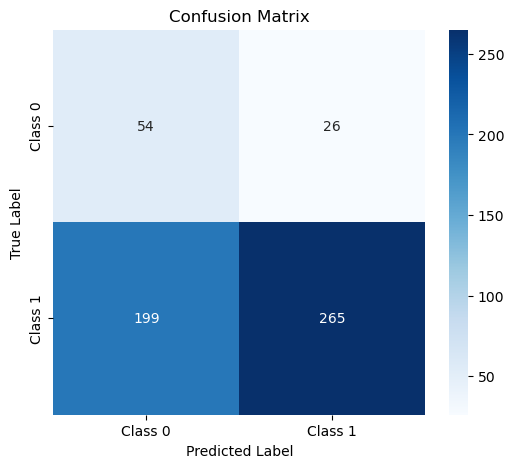

In [9]:
# Confusion matrix
cm = confusion_matrix(y, predictions)

print("Confusion Matrix")
#print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.6750
Specificity: 0.5711

Class 1:
Sensitivity: 0.5711
Specificity: 0.6750

Overall Metrics:
Sensitivity: 0.5711
Specificity: 0.6750


DECISION SCORES METHOD (distance)

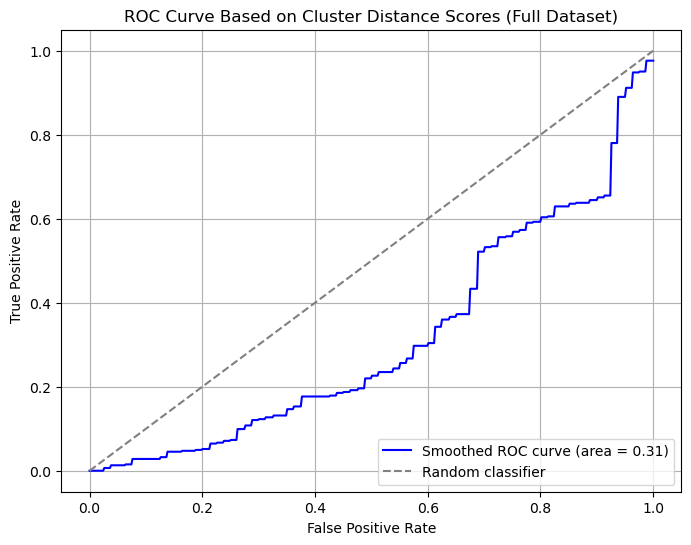

In [11]:
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def decision_scores(X):
    # Convert to numpy array if it's a DataFrame
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    # Reshape X to (n_samples, 1, n_features) for broadcasting
    X_reshaped = X.reshape(X.shape[0], 1, -1)
    centers = kmeans.cluster_centers_.reshape(1, -1, X.shape[1])
    
    distances = np.linalg.norm(X_reshaped - centers, axis=2)
    
    # Return score as difference in distances
    return distances[:, 0] - distances[:, 1]

# Compute decision scores for entire dataset
scores = decision_scores(X)

# ROC Curve calculation using full dataset
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)  # Create finer points for smoothing
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

KMeans - from Scratch

In [12]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.cluster_centers_ = None  # sklearn-compatible attribute

    def fit(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        np.random.seed(self.random_state)
        self.centroids = X_np[np.random.choice(X_np.shape[0], self.n_clusters, replace=False)]
        self.cluster_centers_ = self.centroids  # Align with sklearn interface
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X_np[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
            self.cluster_centers_ = self.centroids

    def predict(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [13]:
# Initialize and fit custom KMeans on entire dataset
custom_kmeans = KMeans(n_clusters=2)
custom_kmeans.fit(X)
labels = custom_kmeans.labels_

# Map cluster labels to actual target values
if accuracy_score(y, labels) < 0.5:
    labels = 1 - labels

accuracy = accuracy_score(y, labels)
print(f'Clustering Accuracy: {accuracy*100:.3f}%')

Clustering Accuracy: 57.353%


In [14]:
print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       0.21      0.69      0.32        80
           1       0.91      0.55      0.69       464

    accuracy                           0.57       544
   macro avg       0.56      0.62      0.51       544
weighted avg       0.81      0.57      0.63       544



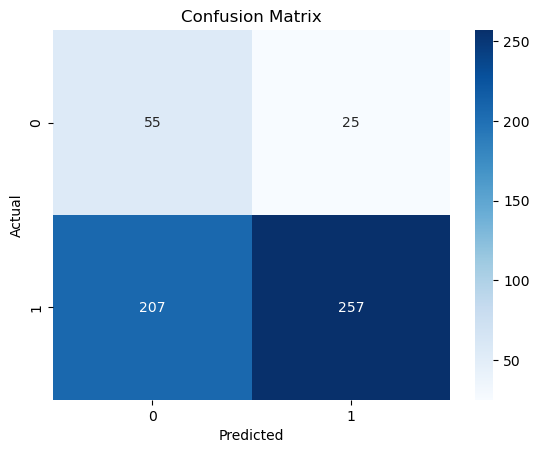

In [15]:
# Confusion Matrix
cm = confusion_matrix(y, labels)
#print("Confusion Matrix:\n", cm)

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.6875
Specificity: 0.5539

Class 1:
Sensitivity: 0.5539
Specificity: 0.6875

Overall Metrics:
Sensitivity: 0.5539
Specificity: 0.6875


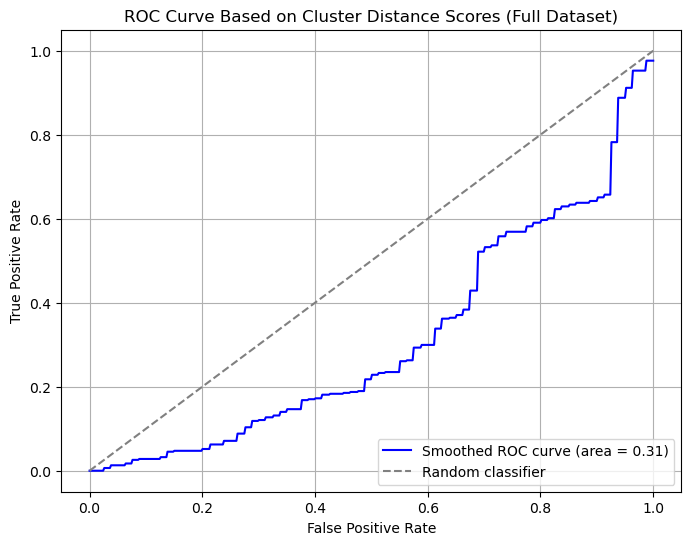

In [17]:
def decision_scores(X, kmeans_model):
    # Convert to numpy array if needed
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - kmeans_model.cluster_centers_, axis=2)
    
    # Return score as difference in distances
    return distances[:, 1] - distances[:, 0]

# Compute decision scores using our custom kmeans on entire dataset
scores = decision_scores(X, custom_kmeans)

# ROC Curve calculation
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

KMEANS - BALANCED DATASET

In [ ]:
# Load dataset
df = pd.read_csv("../Datasets/Balanced_Binary.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,target
0,-1.944044,1.891310,5.378017,-1.099764,0.319998,-0.107990,0.192998,-0.531588,-1.978358,0.505306,...,0.435838,-0.375777,-2.410484,1.307302,-0.447091,-1.205613,-0.758668,-1.115528,1.219782,1
1,0.548890,3.689146,-1.079215,-1.125497,6.892610,-0.114086,-0.129833,-4.471123,1.281707,2.509007,...,-0.515136,-1.814937,-0.659753,0.092014,1.173449,-0.887015,-0.657684,0.676340,0.379053,1
2,1.044743,2.804073,-1.779122,-0.358211,6.132624,-1.309396,-0.731316,-3.381683,-1.444734,3.028355,...,-0.928873,-1.592203,-0.389953,0.343527,0.740160,-0.244341,-1.337129,-0.168281,-0.464880,1
3,-2.848743,-2.220174,-0.498797,-0.054547,0.073406,0.927517,1.891807,-0.381548,0.017551,0.659493,...,0.662054,0.671306,-0.463003,-0.170516,0.249816,0.019505,-0.380889,-0.222127,0.364851,1
4,-0.715628,0.217362,2.032461,-0.144826,4.375660,-1.762026,1.335940,1.742721,-1.771379,0.819612,...,-0.428352,-0.511074,-0.346423,0.137622,-0.289325,-1.089344,-0.407556,-0.007071,0.117600,1


In [19]:
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
target
1    464
0    464
Name: count, dtype: int64


In [20]:
# Splitting features and target
X = df.drop(columns=['target'])
y = df['target']

In [21]:
# Standardizing features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

KMeans - sklearn

In [22]:
from sklearn.cluster import KMeans
# KMeans - sklearn
kmeans = KMeans(n_clusters=2, init='random', n_init=20, random_state=42)
kmeans.fit(X)
predictions = kmeans.predict(X)

# Adjust cluster labels to match ground truth
if np.sum(predictions == y) < np.sum(predictions != y):
    predictions = 1 - predictions  # Inverting labels if they are flipped

# Calculate accuracy (optional, since KMeans is unsupervised)
accuracy = accuracy_score(y, predictions)
print("Final Centroids:", kmeans.cluster_centers_)
print("Cluster Assignments:", predictions)
print(f"\nAccuracy: {accuracy*100:.3f}%")


c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Final Centroids: [[-2.69665771e+00 -3.35039694e-02 -1.05510695e-01  2.89198412e-02
  -2.78358965e-01  1.06046376e-01 -1.19019188e-01  6.18048886e-02
   1.42070866e-01  3.20181555e-01 -4.03323465e-01  2.47186700e-01
  -5.25228682e-02  1.12517779e-01 -1.50443651e-01  5.20978513e-02
   9.50391588e-03  9.59622790e-02 -9.73796042e-02 -3.31589633e-02
   7.42223275e-02  2.99545877e-02  8.62863263e-02  1.15753031e-02
   6.55772034e-02  2.72151486e-02 -1.88844860e-02 -5.56715381e-02
   1.05017096e-02]
 [ 3.42218997e+00 -1.19763129e+00 -3.53556796e-01 -2.15241513e-01
  -8.84783959e-01 -6.62391952e-01  1.02554891e-01  2.10841742e-01
   3.24472673e-01  1.09771560e-01 -2.99660081e-01  1.65395143e-01
  -9.18474804e-02  2.60002603e-01 -4.20897305e-03  2.30526304e-01
  -5.38923908e-03 -1.42055233e-01  9.40175588e-02 -5.66290785e-02
  -2.44184406e-02  3.67877832e-02  6.03438443e-02 -4.83646995e-02
   1.62334954e-02  2.07559334e-02  1.11667234e-01  1.82659926e-03
   7.45819307e-02]]
Cluster Assignments:

In [23]:
# Classification report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       464
           1       0.63      0.59      0.61       464

    accuracy                           0.62       928
   macro avg       0.62      0.62      0.62       928
weighted avg       0.62      0.62      0.62       928



Confusion Matrix


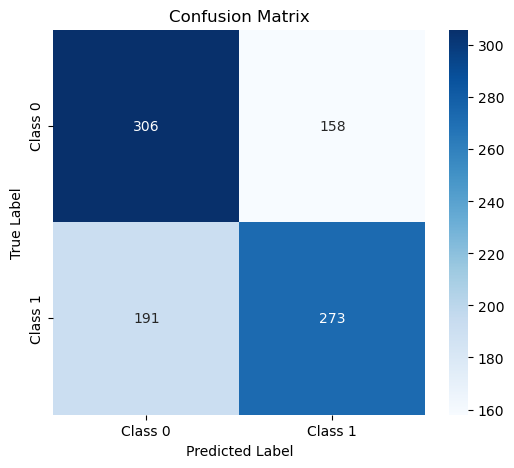

In [24]:
# Confusion matrix
cm = confusion_matrix(y, predictions)

print("Confusion Matrix")
#print("Confusion Matrix:", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.6595
Specificity: 0.5884

Class 1:
Sensitivity: 0.5884
Specificity: 0.6595

Overall Metrics:
Sensitivity: 0.5884
Specificity: 0.6595


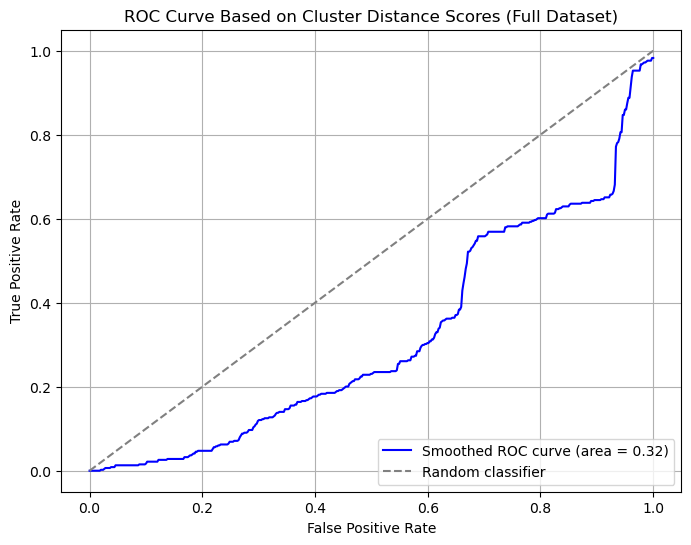

In [26]:
def decision_scores(X, kmeans_model):
    # Convert to numpy array if needed
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - kmeans_model.cluster_centers_, axis=2)
    
    # Return score as difference in distances
    return distances[:, 1] - distances[:, 0]

# Compute decision scores using our custom kmeans on entire dataset
scores = decision_scores(X, custom_kmeans)

# ROC Curve calculation
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

KMeans - from Scratch

In [27]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.cluster_centers_ = None  # sklearn-compatible attribute

    def fit(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        np.random.seed(self.random_state)
        self.centroids = X_np[np.random.choice(X_np.shape[0], self.n_clusters, replace=False)]
        self.cluster_centers_ = self.centroids  # Align with sklearn interface
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X_np[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
            self.cluster_centers_ = self.centroids

    def predict(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [28]:
# Initialize and fit custom KMeans on entire dataset
custom_kmeans = KMeans(n_clusters=2)
custom_kmeans.fit(X)
labels = custom_kmeans.labels_

# Map cluster labels to actual target values
if accuracy_score(y, labels) < 0.5:
    labels = 1 - labels

accuracy = accuracy_score(y, labels)
print(f'Clustering Accuracy: {accuracy*100:.3f}%')

Clustering Accuracy: 62.500%


In [29]:
print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       464
           1       0.63      0.59      0.61       464

    accuracy                           0.62       928
   macro avg       0.63      0.62      0.62       928
weighted avg       0.63      0.62      0.62       928



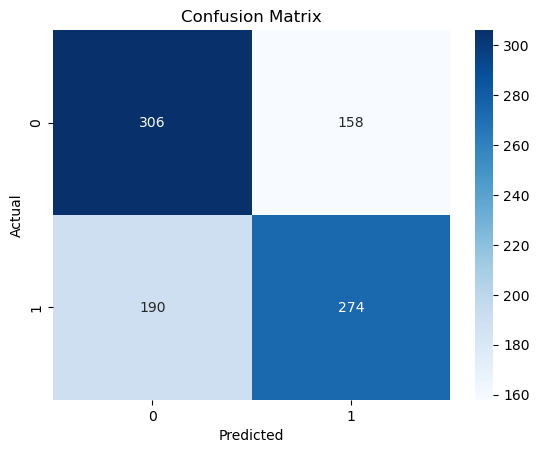

In [30]:
# Confusion Matrix
cm = confusion_matrix(y, labels)
#print("Confusion Matrix:\n", cm)

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.6595
Specificity: 0.5905

Class 1:
Sensitivity: 0.5905
Specificity: 0.6595

Overall Metrics:
Sensitivity: 0.5905
Specificity: 0.6595


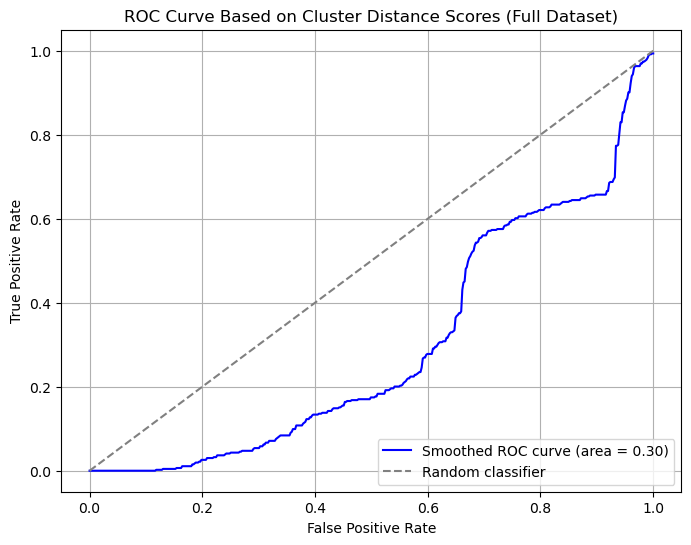

In [32]:
def decision_scores(X, kmeans_model):
    # Convert to numpy array if needed
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - kmeans_model.cluster_centers_, axis=2)
    
    # Return score as difference in distances
    return distances[:, 1] - distances[:, 0]

# Compute decision scores using our custom kmeans on entire dataset
scores = decision_scores(X, custom_kmeans)

# ROC Curve calculation
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()